In [8]:
#made by Glagolev A. N

import numpy as np
import math as m
import gd
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
n = 10
A = np.eye(n)
A = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        A[i, j] =  1.0 / (i + j + 1)
#Other cool formulas: (i + j + 1), max(i, j) + 1
#A = I : единичная матрица
print(A)
b = np.ones(n)
print(type(b))
x0 = np.zeros(n)
step = 1.0 / np.trace(A.T @ A)
print(step)

[[1.         0.5        0.33333333 0.25       0.2        0.16666667
  0.14285714 0.125      0.11111111 0.1       ]
 [0.5        0.33333333 0.25       0.2        0.16666667 0.14285714
  0.125      0.11111111 0.1        0.09090909]
 [0.33333333 0.25       0.2        0.16666667 0.14285714 0.125
  0.11111111 0.1        0.09090909 0.08333333]
 [0.25       0.2        0.16666667 0.14285714 0.125      0.11111111
  0.1        0.09090909 0.08333333 0.07692308]
 [0.2        0.16666667 0.14285714 0.125      0.11111111 0.1
  0.09090909 0.08333333 0.07692308 0.07142857]
 [0.16666667 0.14285714 0.125      0.11111111 0.1        0.09090909
  0.08333333 0.07692308 0.07142857 0.06666667]
 [0.14285714 0.125      0.11111111 0.1        0.09090909 0.08333333
  0.07692308 0.07142857 0.06666667 0.0625    ]
 [0.125      0.11111111 0.1        0.09090909 0.08333333 0.07692308
  0.07142857 0.06666667 0.0625     0.05882353]
 [0.11111111 0.1        0.09090909 0.08333333 0.07692308 0.07142857
  0.06666667 0.0625     

In [10]:
func = lambda x: (A @ x - b).T @ (A @ x - b) * 0.5
grad = lambda x: A.T @ (A @ x - b)

In [11]:
global y_sp, x_sp, x_s, y_s, L_s, L_sp, G_s
x_s = x0
y_s = x_s
L_s = 0
L_sp = (1 + m.sqrt(1 + 4 * L_s * L_s)) * 0.5
L_s = L_sp
L_sp = (1 + m.sqrt(1 + 4 * L_s * L_s)) * 0.5
G_s = (1 - L_s) / L_sp
print(L_s, L_sp, G_s)
def grad_fast_step(grad, step):
    global y_sp, x_sp, x_s, y_s, L_s, L_sp, G_s
    y_sp = gd.gradient_step(x_s, grad, step)
    x_s = (1 - G_s) * y_sp + G_s * y_s
    y_s = y_sp
    
    L_s = L_sp
    L_sp = (1 + m.sqrt(1 + 4 * L_s * L_s)) * 0.5
    G_s = (1 - L_s) / L_sp
#grad_fast_step(grad, step)
print(func(y_s))

1.0 1.618033988749895 0.0
5.0


In [12]:
iter = 600
list_func = []
print(G_s)
for i in range(iter):
    #print(func(y_s))
    list_func.append(func(y_s))
    print(x_s, y_s)
    grad_fast_step(grad, step)
    print(x_s, y_s)
print(list_func)

0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.91871702 0.63356634 0.50287228 0.42244516 0.36643342 0.32461132
 0.29193781 0.26557934 0.243797   0.22545397] [0.91871702 0.63356634 0.50287228 0.42244516 0.36643342 0.32461132
 0.29193781 0.26557934 0.243797   0.22545397]
[0.91871702 0.63356634 0.50287228 0.42244516 0.36643342 0.32461132
 0.29193781 0.26557934 0.243797   0.22545397] [0.91871702 0.63356634 0.50287228 0.42244516 0.36643342 0.32461132
 0.29193781 0.26557934 0.243797   0.22545397]
[0.83494397 0.67377255 0.57162717 0.49898388 0.44395116 0.40050733
 0.36518872 0.33582939 0.3109917  0.28967746] [0.85335886 0.66493447 0.55651355 0.48215923 0.4269113  0.38382396
 0.34908679 0.32038711 0.29622104 0.27555993]
[0.83494397 0.67377255 0.57162717 0.49898388 0.44395116 0.40050733
 0.36518872 0.33582939 0.3109917  0.28967746] [0.85335886 0.66493447 0.55651355 0.48215923 0.4269113  0.38382396
 0.34908679 0.32038711 0.29622104 0.27555993]
[0.67264688 0.68055901 0.621

[-0.49642088 -1.73377637 -0.20298303  0.98756848  1.77853566  2.28942924
  2.61480792  2.81723288  2.93719352  3.00114097] [-0.52316386 -1.67832585 -0.16720858  1.0014356   1.77590149  2.27508492
  2.59225356  2.78893987  2.90490624  2.96610133]
[-0.49642088 -1.73377637 -0.20298303  0.98756848  1.77853566  2.28942924
  2.61480792  2.81723288  2.93719352  3.00114097] [-0.52316386 -1.67832585 -0.16720858  1.0014356   1.77590149  2.27508492
  2.59225356  2.78893987  2.90490624  2.96610133]
[-0.46932517 -1.79196156 -0.24023523  0.9734272   1.78176817  2.30497686
  2.63898104  2.84742856  2.97157571  3.03840309] [-0.49574715 -1.73619347 -0.20439652  0.98717266  1.77888903  2.29030703
  2.61604897  2.81872453  2.93885686  3.00292013]
[-0.46932517 -1.79196156 -0.24023523  0.9734272   1.78176817  2.30497686
  2.63898104  2.84742856  2.97157571  3.03840309] [-0.49574715 -1.73619347 -0.20439652  0.98717266  1.77888903  2.29030703
  2.61604897  2.81872453  2.93885686  3.00292013]
[-0.44233509 -1.

[ 2.21060688 -6.98837678 -3.70579216 -0.45734914  1.91514505  3.56431922
  4.69735303  5.47076922  5.99291613  6.3378025 ] [ 2.1860536  -6.94210221 -3.67371216 -0.44336633  1.91477317  3.55338711
  4.67879249  5.44672693  5.96494954  6.30704596]
[ 2.23503247 -7.03443431 -3.73780384 -0.47134142  1.91548044  3.57521246
  4.7158831   5.49479353  6.02087815  6.36856734] [ 2.21075842 -6.98867428 -3.70603984 -0.45747689  1.91512992  3.56439576
  4.6975009   5.4709716   5.99315978  6.33807719]
[ 2.23503247 -7.03443431 -3.73780384 -0.47134142  1.91548044  3.57521246
  4.7158831   5.49479353  6.02087815  6.36856734] [ 2.21075842 -6.98867428 -3.70603984 -0.45747689  1.91512992  3.56439576
  4.6975009   5.4709716   5.99315978  6.33807719]
[ 2.25915379 -7.07995058 -3.76947903 -0.4852039   1.91579895  3.58598966
  4.73423055  5.51859061  6.0485832   6.39905573] [ 2.23516768 -7.03471147 -3.73803677 -0.47146161  1.91546736  3.57528711
  4.7160263   5.49498928  6.02111379  6.36883304]
[ 2.25915379 -7.

  5.32530226  6.30039633  6.9697711   7.42147426] [ 3.01037404 -8.47416402 -4.78971035 -0.95842072  1.89755307  3.9129944
  5.31674569  6.28862318  6.95557731  7.40547061]
[ 3.03139337 -8.51124559 -4.82027198 -0.9743663   1.89508198  3.92137569
  5.33351106  6.31176193  6.9835216   7.43701454] [ 3.02095646 -8.49283316 -4.80509695 -0.9664487   1.89630897  3.91721406
  5.32518641  6.30027265  6.96964618  7.42135176]
[ 3.03139337 -8.51124559 -4.82027198 -0.9743663   1.89508198  3.92137569
  5.33351106  6.31176193  6.9835216   7.43701454] [ 3.02095646 -8.49283316 -4.80509695 -0.9664487   1.89630897  3.91721406
  5.32518641  6.30027265  6.96964618  7.42135176]
[ 3.04136029 -8.5286654  -4.83490433 -0.98212839  1.8937584   3.92528269
  5.3414828   6.32283787  6.99694752  7.45220751] [ 3.03122868 -8.51087274 -4.82010334 -0.97434257  1.8950249   3.92127618
  5.33339076  6.31163301  6.98339092  7.43688595]
[ 3.04136029 -8.5286654  -4.83490433 -0.98212839  1.8937584   3.92528269
  5.3414828   6.3

  5.30787748  6.39867801  7.17099667  7.7110714 ] [ 2.955273   -8.11590128 -4.94415019 -1.24695492  1.65682627  3.78435752
  5.313666    6.40432981  7.17624462  7.71580116]
[ 2.93838008 -8.07593413 -4.92895157 -1.24721806  1.64907677  3.77348396
  5.30191731  6.39283743  7.16555329  7.70614572] [ 2.94678498 -8.09581937 -4.93651348 -1.24708714  1.65293245  3.77889399
  5.30776275  6.39855535  7.17087265  7.71094968]
[ 2.93838008 -8.07593413 -4.92895157 -1.24721806  1.64907677  3.77348396
  5.30191731  6.39283743  7.16555329  7.70614572] [ 2.94678498 -8.09581937 -4.93651348 -1.24708714  1.65293245  3.77889399
  5.30776275  6.39855535  7.17087265  7.71094968]
[ 2.92973888 -8.0555342  -4.9211451  -1.24730393  1.64515093  3.76794051
  5.29590521  6.38693693  7.16004553  7.70115341] [ 2.93822013 -8.075578   -4.92879161 -1.24719607  1.64902261  3.77339039
  5.3018049   6.39271765  7.16543254  7.70602752]
[ 2.92973888 -8.0555342  -4.9211451  -1.24730393  1.64515093  3.76794051
  5.29590521  6.

  4.84183876  5.96853995  6.79534913  7.39590445] [ 2.27065491 -6.44937371 -4.37057258 -1.31716545  1.29826238  3.3245676
  4.84504731  5.97056016  6.79616365  7.39559376]
[ 2.26556391 -6.4351846  -4.36791287 -1.31995334  1.29389816  3.32041334
  4.84183876  5.96853995  6.79534913  7.39590445] [ 2.27065491 -6.44937371 -4.37057258 -1.31716545  1.29826238  3.3245676
  4.84504731  5.97056016  6.79616365  7.39559376]
[ 2.2606625  -6.42131701 -4.36553616 -1.32289746  1.28950139  3.31632905
  4.83878094  5.96673282  6.79479529  7.39651194] [ 2.26563944 -6.43529126 -4.36804466 -1.32004251  1.29386499  3.32043244
  4.84190204  5.96863911  6.79547683  7.39605462]
[ 2.2606625  -6.42131701 -4.36553616 -1.32289746  1.28950139  3.31632905
  4.83878094  5.96673282  6.79479529  7.39651194] [ 2.26563944 -6.43529126 -4.36804466 -1.32004251  1.29386499  3.32043244
  4.84190204  5.96863911  6.79547683  7.39605462]
[ 2.25587711 -6.40766822 -4.36331312 -1.32590955  1.28510544  3.31229661
  4.83581209  5.96

  4.81831219  6.07725001  7.02190131  7.72373568]
[ 2.17894531 -5.96652051 -4.52588472 -1.65412609  1.0048054   3.15673989
  4.82225669  6.0867755   7.03615865  7.74191323] [ 2.17731921 -5.96809631 -4.51957307 -1.64730967  1.0091859   3.15791249
  4.82029096  6.08202849  7.02905353  7.73285448]
[ 2.17894531 -5.96652051 -4.52588472 -1.65412609  1.0048054   3.15673989
  4.82225669  6.0867755   7.03615865  7.74191323] [ 2.17731921 -5.96809631 -4.51957307 -1.64730967  1.0091859   3.15791249
  4.82029096  6.08202849  7.02905353  7.73285448]
[ 2.18071195 -5.9651708  -4.53241761 -1.66107427  1.00038893  3.15561418
  4.82433635  6.09168923  7.04347151  7.7512113 ] [ 2.17902117 -5.96662873 -4.52601651 -1.65421466  1.00477292  3.15675955
  4.82232032  6.08687478  7.03628629  7.74206315]
[ 2.18071195 -5.9651708  -4.53241761 -1.66107427  1.00038893  3.15561418
  4.82433635  6.09168923  7.04347151  7.7512113 ] [ 2.17902117 -5.96662873 -4.52601651 -1.65421466  1.00477292  3.15675955
  4.82232032  6.

  4.95333965  6.36689141  7.44137438  8.24996835] [ 2.30012908 -5.96789494 -4.89000028 -2.01220744  0.79066285  3.11796063
  4.95044365  6.36076021  7.43252994  8.23889502]
[ 2.30289209 -5.96809879 -4.89814779 -2.02015429  0.78594309  3.11714675
  4.95333965  6.36689141  7.44137438  8.24996835] [ 2.30012908 -5.96789494 -4.89000028 -2.01220744  0.79066285  3.11796063
  4.95044365  6.36076021  7.43252994  8.23889502]
[ 2.30563497 -5.9682122  -4.90631551 -2.02815556  0.78117355  3.11630235
  4.95622826  6.37303775  7.45025421  8.26109458] [ 2.30289023 -5.96805404 -4.89818222 -2.02020528  0.78590405  3.11712902
  4.95334458  6.36691728  7.4414185   8.25002789]
[ 2.30563497 -5.9682122  -4.90631551 -2.02815556  0.78117355  3.11630235
  4.95622826  6.37303775  7.45025421  8.26109458] [ 2.30289023 -5.96805404 -4.89818222 -2.02020528  0.78590405  3.11712902
  4.95334458  6.36691728  7.4414185   8.25002789]
[ 2.3083563  -5.96827348 -4.91446493 -2.03615868  0.77639299  3.1154436
  4.95910209  6.3

  5.06433675  6.64927039  7.86956663  8.79928701]
[ 2.38852802 -5.82552459 -5.28378383 -2.45434804  0.49884278  3.0309384
  5.06600533  6.65691725  7.88240795  8.81651206] [ 2.38860499 -5.83146234 -5.27870729 -2.44708366  0.50432152  3.03334525
  5.06517328  6.65310409  7.87600454  8.80792268]
[ 2.38852802 -5.82552459 -5.28378383 -2.45434804  0.49884278  3.0309384
  5.06600533  6.65691725  7.88240795  8.81651206] [ 2.38860499 -5.83146234 -5.27870729 -2.44708366  0.50432152  3.03334525
  5.06517328  6.65310409  7.87600454  8.80792268]
[ 2.3883078  -5.81925401 -5.28872608 -2.46160708  0.49330397  3.02844176
  5.06673683  6.66062897  7.88871406  8.82501071] [ 2.388456   -5.8253418  -5.28373013 -2.45436485  0.49879796  3.03088693
  5.06595715  6.65687662  7.88237635  8.81648962]
[ 2.3883078  -5.81925401 -5.28872608 -2.46160708  0.49330397  3.02844176
  5.06673683  6.66062897  7.88871406  8.82501071] [ 2.388456   -5.8253418  -5.28373013 -2.45436485  0.49879796  3.03088693
  5.06595715  6.65

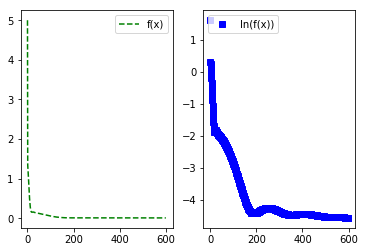

In [13]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(list_func,'g--', label='f(x)')
plt.legend(loc=0)
plt.subplot(1,2,2)
plt.plot(np.log(list_func), 'bs', label='ln(f(x))')
plt.legend(loc=2)
plt.show()

In [7]:
#A[i, j] = Символ Кронекера от i, j